In [2]:
!pip3 install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Project 2 AI Chat Notebook

In this notebook, we want to see the code you use to solve
the machine learning tasks below.  Additionally, we will want to see an image of a graph representing 
the training times and accuracy of supervised models.

When run, this notebook should first run the unsupervised learning algorithm, and then the supervised algorithm.


# Unsupervised Learning

In this section, we will use the data set as a whole and classify the code using the unsupervised K-means clustering algorithm.
Use the imports below.
 

In [3]:
import glob

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer


- Load all data files matching 'data/datasets/train-00000-5k-2*.parquet'.
- Merge those dataframes into a single dataframe "df".

In [4]:
# enter code fragment here
import pandas as pd
import glob

# Get a list of all file paths matching the pattern
file_paths = glob.glob('data/datasets/train-00000-5k-*.parquet')

# Load each file into a dataframe and store them in a list
dfs = [pd.read_parquet(file) for file in file_paths]

# Merge all dataframes into a single dataframe
df = pd.concat(dfs, ignore_index=True)

- Define the code snippets (from data frames's "code" attribute)
- Define labels (from dataframe's "language" attribute)

In [5]:
# Extract code snippets from the "code" attribute
code_snippets = df['code'].tolist()

# Extract labels from the "language" attribute
labels = df['language'].tolist()# enter code fragment here

- Define the code snippets (from data frames's "code" attribute)
- Define labels (from dataframe's "language" attribute)

In [6]:
# enter code fragment here

- Convert code snippets to TF-IDF features

- Perform K-Means clustering

- Print the cluster assignments with each cluster being truncated to 50 characters long.


In [7]:
# enter code fragment here
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the code snippets to TF-IDF features
tfidf_features = vectorizer.fit_transform(code_snippets)

from sklearn.cluster import KMeans

# Initialize the KMeans clustering algorithm
kmeans = KMeans(n_clusters=5)

# Fit the TF-IDF features to the KMeans model
kmeans.fit(tfidf_features)

# Get the cluster labels for each code snippet
cluster_labels = kmeans.labels_

In [23]:
# Create a dictionary to store snippets for each cluster
cluster_snippets = {i: [] for i in range(5)}
DocLen=500
# Iterate over each snippet and assign it to the corresponding cluster
for i, snippet in enumerate(code_snippets):
    cluster = cluster_labels[i]
    truncated_snippet = snippet.replace('\n', ' ')[:DocLen] + '...' if len(snippet) > DocLen else snippet.replace('\n', ' ')
    cluster_snippets[cluster].append(truncated_snippet)

# Print 6 examples from each cluster
for cluster, snippets in cluster_snippets.items():
    print(f"Cluster {cluster}:")
    for i in range(min(6, len(snippets))):
        # print(snippets[i])
        print(f"Example {i+1}: {snippets[i]}")
        print("")
    print()

Cluster 0:
Example 1: /**  * Copyright (c) Microsoft Corporation. All rights reserved.  * Licensed under the MIT License. See License.txt in the project root for  * license information.  *  * Code generated by Microsoft (R) AutoRest Code Generator.  */  package com.microsoft.azure.management.datafactory.v2018_06_01;  import com.fasterxml.jackson.annotation.JsonProperty; import com.fasterxml.jackson.annotation.JsonTypeInfo; import com.fasterxml.jackson.annotation.JsonTypeName;  /**  * The location of Google Cloud Stor...

Example 2: ﻿namespace MyColors {     partial class SimpleToolTip     {         /// <summary>         /// Required designer variable.         /// </summary>         private System.ComponentModel.IContainer components = null;          /// <summary>         /// Clean up any resources being used.         /// </summary>         /// <param name="disposing">true if managed resources should be disposed; otherwise, false.</param>         protected override void Dispose(bool dis

In [28]:
# # Generate code to make a plot (use mathplotlib) showing the data points and clusters. Use a distinct color for each cluster
# import matplotlib.pyplot as plt
# 
# # Create a list to store the selected data points for plotting
# selected_points = []
# 
# # Iterate over each cluster and select 20 observations
# for cluster, snippets in cluster_snippets.items():
#     selected_points.extend(snippets[:20])
# 
# # Create a scatter plot of the selected data points
# plt.figure(figsize=(10, 6))
# for i, snippet in enumerate(selected_points):
#     cluster = cluster_labels[i]
#     color = f'C{cluster}'
#     plt.scatter(i, 0, color=color, marker='|')
# 
# # Set plot title and labels
# plt.title('Data Points and Clusters')
# plt.xlabel('Data Point')
# plt.ylabel('Cluster')
# 
# # Set x-axis limits and remove y-axis ticks
# plt.xlim(0, len(selected_points))
# plt.yticks([])
# 
# # Show the plot
# plt.show()

## TODO: Unsupervised Learning Cluster Explanation

- This should be an English paragraph statement declaring how you assessed the quality/meaning of the clusters.
This should be simply explaining how you think each cluster is formed/defined.

## Cluster Explanation

Cluster 0: This cluster consists of Java code snippets. Examples 1-5 include code like 'import com.fasterxml.jackson.annotation.JsonTypeInfo', 'private System.ComponentModel.IContainer', 'using System.Collections.Generic', 'using System.Collections', and 'import java.io.IOException'. These codes are maintained in examples 1-5, illustrating that Cluster 0 represents Java code snippets.

Cluster 1: This cluster represents JavaScript code snippets. For example, snippet 4 belongs to JavaScript code, and one example belongs to PHP code. As 80% of the examples belong to JavaScript code, we consider this cluster as the JavaScript code cluster.

Cluster 2: This cluster represents C code. Examples 1, 3, and 4 contain C code, Example 5 is CSS code, and Example 6 is JavaScript code. The majority of the examples belong to C code. Hence, Cluster 2 is the C code cluster.

Cluster 3: This cluster represents HTML code. Among the six examples, all are written in HTML language.

Cluster 4: This cluster represents Copyright and Permission to use, copy, modify information in all the examples.

# Supervised Learning

Write a python script that loads successively larger data files and merges them into larger training sets.
For each training set, let's track training time, prediction time, and accuracy.
Use the imports below.

In [ ]:
import glob
import time

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


- Track measurements for each round: the round number/index, how long in seconds the train, predict steps take, and an accuracy report
- Use a list of dictionaries for measurement storage, with "round", "train", "predict", "accuracy" as keys

- Write a function named learn that takes a dataframe and an index as parameters.
- The index indicates the round number of learning. The function should:
- 1. Create a dictionary to store the measurements for this round
- 2. Print a message indicating the round number
- 3. Store the round number in the dictionary under 'round'
- 4. Split the dataframe into code snippets and labels
- 5. Split the code snippets and labels into training and test sets
- 6. Create a TF-IDF vectorizer
- 7. Use the 'fit_transform' method on the training data to learn the vocabulary and idf, and return term-document matrix.
- 8. Use the 'transform' method on the test data to transform documents to document-term matrix.
- 9. Create a Support Vector Machine classifier
- 10. Train the classifier using the training data
- 11. Save the model to a file and load it back from a file (to make sure it works)
- 12. Use the classifier to predict the labels for the test data
- 13. Print the classification report which should be a dictionary
- 14. Store the training time in the dictionary under 'train'
- 15. Store the prediction time in the dictionary under 'predict'
- 16. Store the classification report in the dictionary under 'report'
- 17. Add 'accuracy' to the dictionary and set it to the accuracy score from the classification report
- 18. Append the dictionary to the measurements list for this round

- Load all data files matching 'data/datasets/train-00000-5k*.parquet'.
- For each file loaded, merge the latest data file with the merged data to date,
- and call the learn function with the dataframe and the index of the file in the list of files.

- If I have measurements in Python like a list of dictionaries such as:
- `[{'round': 0, 'train': 32.76, 'predict': 2.13, 'accuracy': 0.78},....]`
- let us plot lines on the same graph for tfidf, train, predict and accuracy using python?  Use matplotlib.
- Add a legend.  Add axis labels.  Add a title.
- Lets save the plot to a file "supervised-plotter.png" before showing the plot.

In [35]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import joblib
import time
from sklearn.metrics import accuracy_score, classification_report

def load_data_files():
    file_list = glob.glob('data/datasets/train-00000-5k*.parquet')
    merged_data = pd.DataFrame()
    measurements_list=[]
    for i, file in enumerate(file_list):
        
        data = pd.read_parquet(file)
        merged_data = pd.concat([merged_data, data])
        measurements= learn(merged_data, i)
        measurements_list.append(measurements)
    return measurements_list
        
def learn(dataframe, file_index):
    
    # Extract code snippets and labels
    code_snippets = dataframe['code']
    labels = dataframe['language']
    
    # Split code snippets and labels into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(code_snippets, labels, test_size=0.2, random_state=42)
    
    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    
    # Learn vocabulary and idf, and return term-document matrix for training data
    X_train_tfidf = vectorizer.fit_transform(X_train)
    
    # Transform test data to document-term matrix
    X_test_tfidf = vectorizer.transform(X_test)
    
    # Create SVM classifier
    svm_classifier = SVC()
    
    # Train the classifier using the training data
    start_time = time.time()
    svm_classifier.fit(X_train_tfidf, y_train)
    end_time = time.time()
    
    train_time = end_time - start_time
    
    # Save the model to a file
    model_file = f"svm_model_{file_index}.joblib"
    joblib.dump(svm_classifier, model_file)
    
    # Load the model from the file
    loaded_model = joblib.load(model_file)
    # Use the classifier to predict the labels for the test data
    start_time = time.time()
    y_pred = loaded_model.predict(X_test_tfidf)
    end_time = time.time()
    
    predict_time = end_time - start_time
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the classification report
    classification_report_dict = classification_report(y_test, y_pred, output_dict=True)
    
    # Create a dictionary to store the measurements
    measurements = {
        'train': train_time,
        'predict': predict_time,
        'report': classification_report_dict,
        'accuracy': accuracy
    }
    # Your further learning algorithm implementation goes here
    # You can use loaded_model, X_test_tfidf, y_test for testing
    
    # Example implementation
    print(f"Learning from file {file_index}:")
    print("Training set:")
    print(X_train_tfidf.shape)
    print(y_train.head())
    print("Test set:")
    print(X_test_tfidf.shape)
    print(y_test.head())
    # Print the predicted labels
    print("Predicted labels:")
    # print(y_pred.head())
    print(y_pred[:5]) 
    return measurements

# Call the load_data_files function to start the process
measurements_list= load_data_files()
print(measurements_list)

C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

Learning from file 0:
Training set:
(4000, 137161)
4227      Markdown
4676           C++
800            PHP
3671           C++
4193    Dockerfile
Name: language, dtype: object
Test set:
(1000, 137161)
1501            C#
2586    JavaScript
2653          Ruby
1055          Java
705           HTML
Name: language, dtype: object
Predicted labels:
['C#' 'Markdown' 'Ruby' 'Java' 'HTML']


C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

Learning from file 1:
Training set:
(8000, 376392)
4254             C
1561      Markdown
1670    JavaScript
1087         Shell
1669             C
Name: language, dtype: object
Test set:
(2000, 376392)
1252          Java
4684      Markdown
1731           PHP
4742          HTML
4521    JavaScript
Name: language, dtype: object
Predicted labels:
['Java' 'Markdown' 'PHP' 'HTML' 'JavaScript']


C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

Learning from file 2:
Training set:
(12000, 511514)
4839       GO
4680        C
2093      C++
1293    Scala
820      Java
Name: language, dtype: object
Test set:
(3000, 511514)
1499    Markdown
1475        Java
3167    Markdown
862         HTML
970         Java
Name: language, dtype: object
Predicted labels:
['Markdown' 'Java' 'Markdown' 'HTML' 'Java']


C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

Learning from file 3:
Training set:
(16000, 663317)
894           HTML
3728    JavaScript
3958    JavaScript
2671          Java
999           HTML
Name: language, dtype: object
Test set:
(4000, 663317)
650       C
2041    PHP
3668    PHP
1114      C
3902    PHP
Name: language, dtype: object
Predicted labels:
['C' 'PHP' 'PHP' 'C' 'PHP']
Learning from file 4:
Training set:
(20000, 869432)
3311             C
3623           PHP
1020           PHP
2645          Java
1533    TypeScript
Name: language, dtype: object
Test set:
(5000, 869432)
1868         CSS
4016         CSS
4668          C#
3640        Java
4018    Markdown
Name: language, dtype: object
Predicted labels:
['CSS' 'CSS' 'C#' 'Java' 'Markdown']
[{'train': 20.572086095809937, 'predict': 1.6904053688049316, 'report': {'Assembly': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, 'Batchfile': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'C': {'precision': 0.8428571428571429, 'recall': 0.84285

C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shekh\OneDrive\Desktop\VT courses\AI tools\CS5914\module2\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

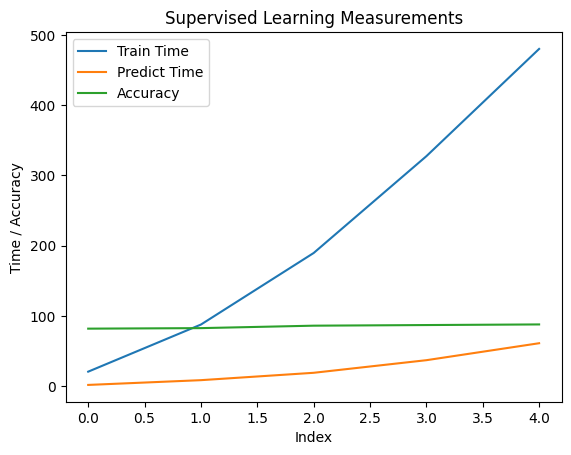

In [49]:
import matplotlib.pyplot as plt
indices = [i for i in range(len(measurements_list))]
train_times = [measurements['train'] for measurements in measurements_list]
predict_times = [measurements['predict'] for measurements in measurements_list]
accuracies = [measurements['accuracy']*100 for measurements in measurements_list]

plt.plot(indices, train_times, label='Train Time')
plt.plot(indices, predict_times, label='Predict Time')
plt.plot(indices, accuracies, label='Accuracy')

plt.xlabel('Index')
plt.ylabel('Time / Accuracy')
plt.title('Supervised Learning Measurements')
plt.legend()

plt.savefig('supervised-plotter.png')
plt.show()

In [48]:
for measure in measurements_list:
    print(f"Train time= {measure['train']}")
    print(f"predict time= {measure['predict']}")       
    print(f"accuracy= {measure['accuracy']}")

Train time= 20.572086095809937
predict time= 1.6904053688049316
accuracy= 0.818
Train time= 87.62093949317932
predict time= 8.460706233978271
accuracy= 0.8255
Train time= 189.48909378051758
predict time= 18.955503940582275
accuracy= 0.8603333333333333
Train time= 327.3161642551422
predict time= 36.894771337509155
accuracy= 0.86925
Train time= 480.023029088974
predict time= 61.04737854003906
accuracy= 0.878
